<a href="https://colab.research.google.com/github/krishnamittal01/data-science/blob/main/Complete_Single_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv("/content/height-weight (1).csv")

In [68]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [70]:
## Differentiate both the features in dependent and independent values

X=df[['Height']]##independent

y=df['Weight']##dependent




In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [73]:
##Standerdising the dataset trian independent data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

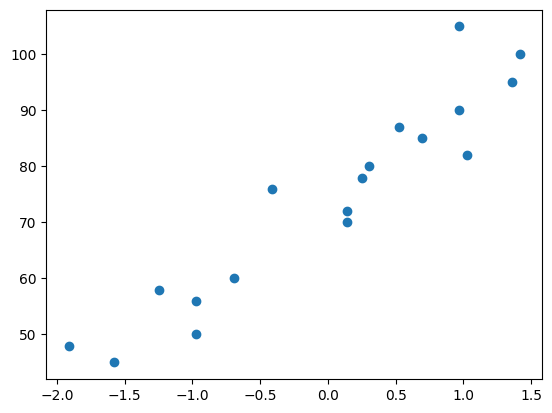

In [74]:
plt.scatter(X_train,y_train)

In [75]:
##train the simple linear regression model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
print('The slope or coefficient of Weight is',lr.coef_)
print('The intercept of Weight is',lr.intercept_)

The slope or coefficient of Weight is [16.71556824]
The intercept of Weight is 74.27777777777777


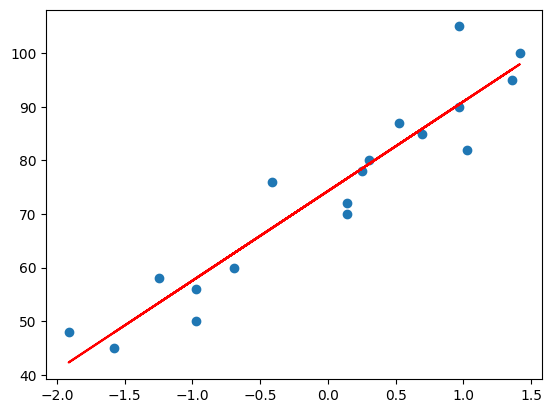

In [79]:
plt.scatter(X_train,y_train)
## create a best fit line
plt.plot(X_train,lr.predict(X_train),color='red')

##prediction of train data
1. predicted height output=intercept+coef_(weight)
2. y_pred_train=74.27777+16.21(X_text)


##prediction of test data
1. predicted height output = intercept + corf_(Weights)
2. y_pred_test=74.2777+16.21(X_test)

In [81]:
## prediction of the test data

y_test_pred=lr.predict(X_test)

In [82]:
y_test_pred,y_test

(array([92.36074777, 85.86942521, 39.50283548, 96.99740674, 75.66877547]),
 15    78
 9     78
 0     45
 8     95
 17    65
 Name: Weight, dtype: int64)

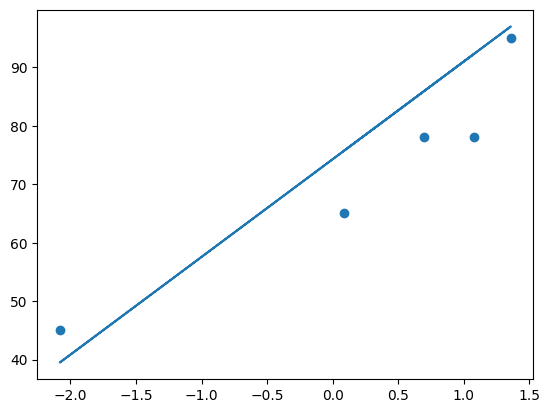

In [83]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred)

## calculating the MAE , MSE , RMSE

##     R SQUARE AND ADJUSTED R SQUARE

In [86]:
##Performance matrix
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_test_pred)
r2=r2_score(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)       #### as the value is decreasing of these it means that our model is performing even much more better

rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(r2)

83.23803021031195
8.078703941181502
9.123487831433325
0.6981504561563971


In [90]:
##Adjusted R square=1-[(1-r2)*(n-1)/(n-k-1)]
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r2


0.5975339415418628

##predicton for new data points by our model

In [95]:
# for example say we have 80 as our new weight then how we will make the predicton using our model of lr

scaled_weight=sc.transform([[80]])
scaled_weight

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-4.29947777]])

In [100]:
lr.predict(scaled_weight)

array([2.40956371])

In [101]:
residuals=y_test-y_test_pred
residuals

,Weight
15,-14.360748
9,-7.869425
0,5.497165
8,-1.997407
17,-10.668775


<ipython-input-106-639086438373>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Weight', ylabel='Density'>

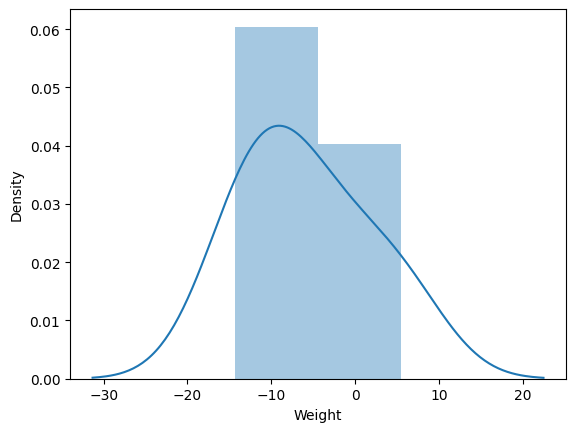

In [106]:
import seaborn as sns
sns.distplot(residuals)